<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>October 26, 2023</center>

# <center><ins>TP Class N°3 - Image acquisition and sensing</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 9 November 2023, 23h59**.
* The name of the file you upload should be **TP3_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP3_name_surname.zip**.

# Exercise 1

Have a look at the following image :

![photography main parameters](images/photography_main_parameters.jpg)

Using these illustrations, explain the concepts of Aperture, Shutter speed and ISO. How are they built in a modern Digital Single-Lens Reflex ?

Aperture regulate the quantity of photons received by the image sensor... It's a hole where the light go through before reaching the image sensor. This affects the depth of field: a little hole, so a high aperture value allows us to have a more big depth of field, and a big hole allows us to have a smaller depth of field... 

Shutter speed determines for how long the image sensor collect photons... So if the image sensor collect photons for a long time, like 1/2, the image is blured if the subject moves because the sensor will receive photons of people in different positions, but if sensor collect photons for a small time, like 1/1000, the image isn't blur if the subject move, because the subject has no time to move before the 'collect of photons' is finished.

ISO measure the sensivity of the image sensor. If the image sensor isn't very sensible (like 50), the image is with not much grain. But if the image sensor is very sensible, like 25600, the image has many grain, but it allows us to take images in more darken environments.

# Exercise 2

(a) In a 100 × 100 RGB image each pixel is represented by 256 levels of intensity. How many bytes are needed to store these image without any compression?

For coding 1 pixel, we need 8 bits because $log_2(256) = 8$, and we have 256 levels of intensity. As a byte is equal to 8 bits, to store an RGB image $100\times100$ without any compression, we need:
$$\frac{100 \times 100 \times 3 \times 8}{8} = 30000\ bytes$$

(b) In a 100 × 100 gray-scale image each pixel is represented by 4 levels of intensity. How many bytes are needed to store these image without any compression?

Each pixel is represented by 4 levels of intensity. So we need 2 bits to encode this information: $log_2(4) = 2$. So to store the gray-scale image $100 \times 100$ without any compression, we need:
$$\frac{100 \times 100 \times 2}{8} = 2500\ bytes$$ 

(c) Generate a $100 \times 100$ RGB image constituted of uniform random noise (use *numpy.random.uniform()*). Save it as a png file using *plt.imsave()*. Comment on the size of the file.

**Hint :** In order to understand what is going on, you might want to load the image again in Python using *plt.imread()*

Informations of the image created
----------------------------------
Image data type: float32
Image shape: (100, 100, 3)
Dynamic range: 0.9999362230300903


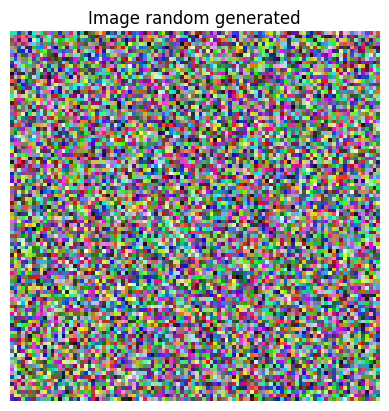

Informations of the image saved and reloaded
--------------------------------------------
Image data type: float32
Image shape: (100, 100, 4)
Dynamic range: 1.0


In [50]:
import matplotlib.pyplot as plt
import numpy as np

def generate_image() -> np.ndarray:
    image = np.random.uniform(size=(100, 100, 3))
    image = np.float32(image)
    return image

def image2float(image: np.ndarray) -> np.ndarray:
    if image.dtype == np.uint8:
        image = np.float32(image/255)
    elif image.dtype == np.float64:
        image = np.float32(image)
    return image

def print_informations_image(image: np.ndarray):
    print("Image data type: " + str(image.dtype))
    print("Image shape: " + str(image.shape))
    print(f"Dynamic range: {np.max(image) - np.min(image)}")

def print_image(image: np.ndarray, title: str, cmap='viridis'):
    plt.figure()
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

def MSE(image1: np.ndarray, image2: np.ndarray):
    return np.linalg.norm(image1 - image2)
    
def save_image(image: np.ndarray, name: str):
    plt.imsave('./images_saved/' + name, image)

def load_image(name: str, path='./images_saved/'):
    return plt.imread(path + name)

random_image = generate_image()
print("Informations of the image created")
print("----------------------------------")
print_informations_image(random_image)
print_image(random_image, "Image random generated")
save_image(random_image, 'saved.png')
random_image_saved = load_image('saved.png')
print("Informations of the image saved and reloaded")
print("--------------------------------------------")
print_informations_image(random_image_saved)


When we store our image, the png format add a new channel, the alpha channel, which is a measure of the transparency value of each pixel, So the image has a size of $100\times 100 \times 4 = 40000 bytes$, which is more than the expected $30000 bytes$. The image is called RGBA because of the alpha channel.

(d) Generate a $100 \times 100$ grayscale gradient image (see TP1 ex 2). Save it again as a png file. Comment.

Informations of the image created
----------------------------------
Image data type: float32
Image shape: (100, 100)
Dynamic range: 1.0


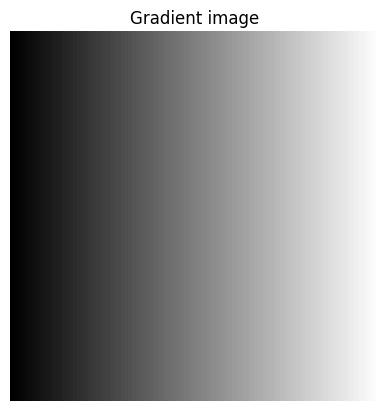

Informations of the image saved and reloaded
--------------------------------------------
Image data type: float32
Image shape: (100, 100, 4)
Dynamic range: 0.9960784316062927


In [51]:
def generate_gradient_image(heigh: int, weight: int) -> np.ndarray:
    gradient = np.linspace(0, 255, weight, dtype=np.uint8)
    gradient = np.tile(gradient, (heigh, 1))
    return gradient

gradient = generate_gradient_image(100, 100)
gradient = image2float(gradient)
print("Informations of the image created")
print("----------------------------------")
print_informations_image(gradient)
print_image(gradient, "Gradient image", 'gray')
save_image(gradient, 'gradient.png')
gradient_saved = load_image('gradient.png')
print("Informations of the image saved and reloaded")
print("--------------------------------------------")
print_informations_image(gradient_saved)


PNG format has saved the image with 4 channels: Red, Green, Blue and Alpha, which is a measure of the transparency of each pixel. It save the image into 4 channel because the png format don't make any compression, so the size of the image is $100\times 100 \times 4 = 40000\ bytes$, which is more than the expected size of $2500\ bytes$ (it's $20$ times more than the expected result because of the no compression !) 

# Exercise 3

(a) Explain the difference between sampling and quantization.
sampling: pixels de l'image: rendre la grille des pixels
quantization: distrétiser les valeurs dans la grille

For a continuous function given, sampling cuts our functions in regular intervales (so it discretize our function...), whereas quantization make an approximation of our function for each discretized values given... And we store just the values aproximated and discretized. It's usefull for instante to encode an image with just 64 levels of intensity (so with $log_2(64) = 6$ bits): we make a quantization to have our pixel's image just with the right level of intensity, and then we can store our image with less bytes because we don't need 8 bits to encode image with 64 levels of intensity, but just 6.

For instance, I show you an example below with function sinus on range [0, 5]. We discretize our function thanks to sampling, and then we approximate values thanks to quantization.

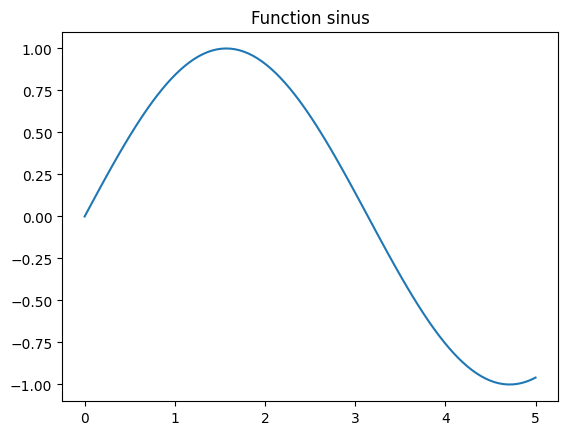

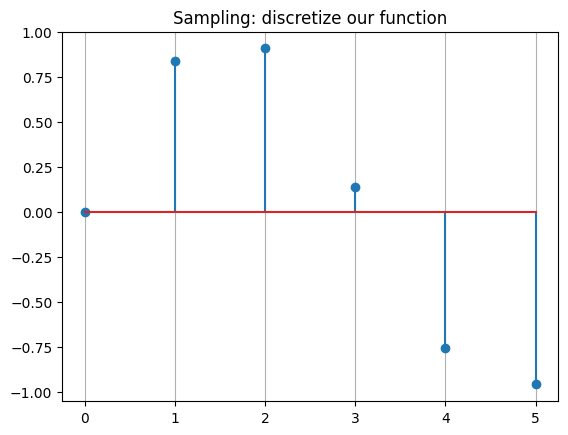

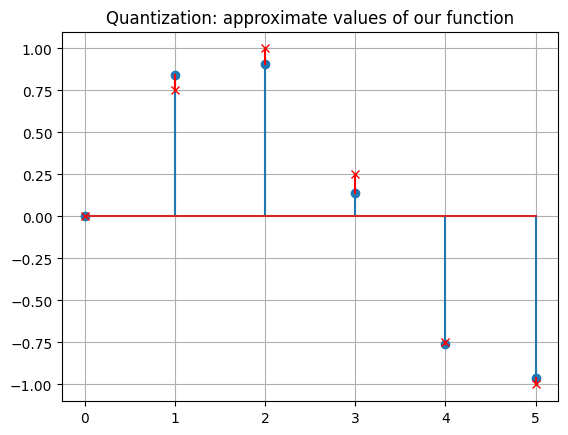

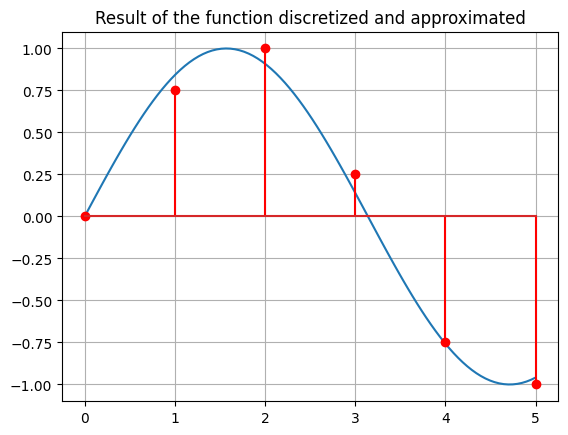

In [53]:
def example():
    x = np.linspace(0, 5, 100)
    y = np.sin(x)
    x_grid = [i for i in range(6)]
    y_grid = np.sin(x_grid)
    plt.figure()
    # plt.subplot(1, 3, 1)
    plt.plot(x, y)
    plt.title('Function sinus')
    plt.show()
    # plt.subplot(1, 3, 2)
    # plt.plot(x, y)
    #plt.plot(x_grid, y_grid, 'ro')
    plt.stem(x_grid, y_grid)
    plt.title('Sampling: discretize our function')
    plt.grid(axis = 'x')
    plt.show()
    # plt.subplot(1, 3, 3)
    #plt.plot(x, y)
    plt.stem(x_grid, y_grid, '.')
    plt.plot([1, 1], [y_grid[1], 0.75], 'r-')
    plt.plot([2, 2], [y_grid[2], 1], 'r-')
    plt.plot([3, 3], [y_grid[3], 0.25], 'r-')
    plt.plot([4, 4], [y_grid[4], - 0.75], 'r-')
    plt.plot([5, 5], [y_grid[5], -1], 'r-')
    y_quantized = [0, 0.75, 1, 0.25, -0.75, -1]
    plt.plot(x_grid, y_quantized, 'rx')
    plt.title("Quantization: approximate values of our function")
    plt.grid()
    plt.show()
    plt.figure()
    plt.plot(x, y)
    plt.stem(x_grid, y_quantized, 'r')
    plt.grid()
    plt.title("Result of the function discretized and approximated")
    plt.show()

example()

(b) You are given a continuous signal  *$f(x) = sin(x)+\frac{1}{10} cos(10x)$* over the interval *$0 \leq  x \leq 8 \pi$* and *$-1.1 \leq y \leq 1.1$*.

Using *np.linspace()* and *plt.plot()*, visualize this continuous signal on the given interval with a high number of samples.

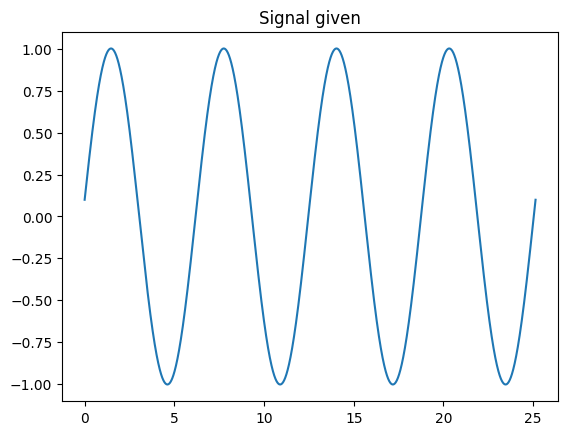

In [54]:
def visualize_signal():
    x = np.linspace(0, 8*np.pi, 10000)
    y = np.sin(x) + np.cos(x)/10
    plt.figure()
    plt.plot(x, y)
    plt.title("Signal given")
    plt.show()

visualize_signal()

(c) Choose various values of sampling and quantization for this signal and plot the results on a grid of subplots, varying both parameters. Comment on the quality of the approximation.

**Hint :** Use *np.linspace()* and *np.digitize()* to generate the correct sampling and quantizations, try different values of samples and bins.

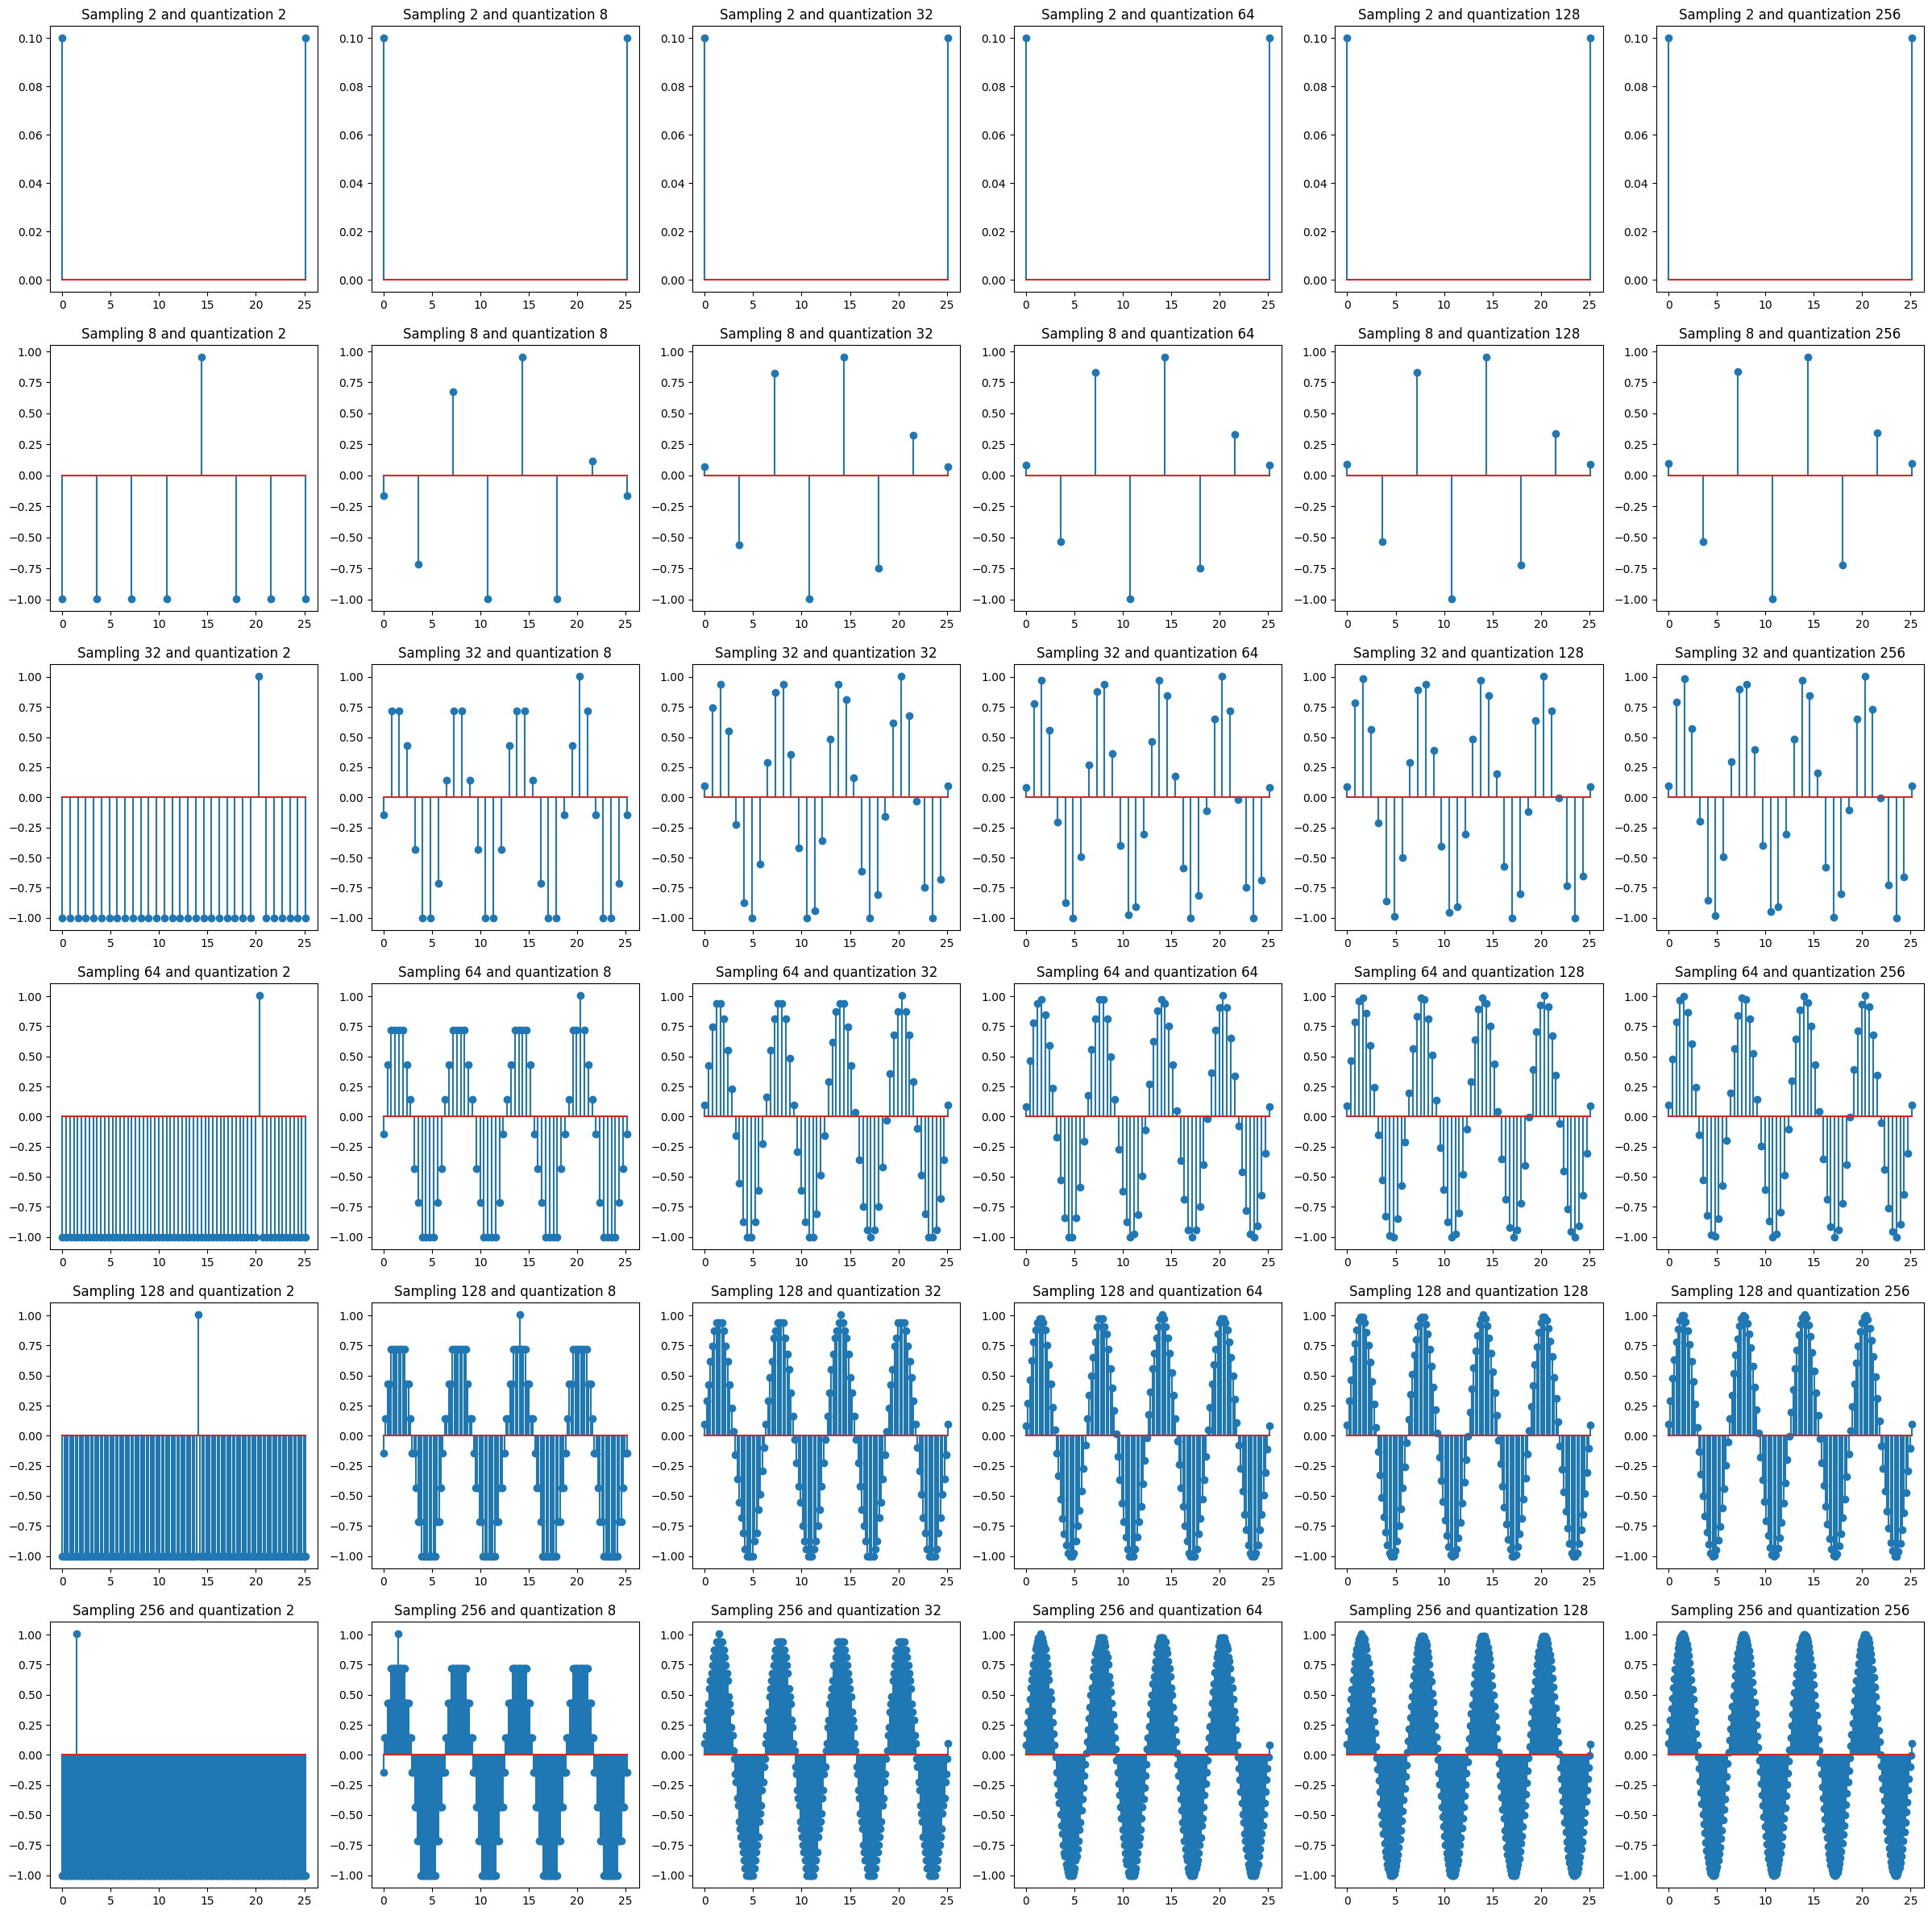

In [55]:
f = lambda x: np.sin(x) + np.cos(x)/10

def sampling_quantize(f, x_min, x_max, sampling, quantization):
    x = np.linspace(x_min, x_max, sampling)
    y = f(x)
    y_quantization = np.linspace(np.min(y), np.max(y), quantization)
    index_quantization = np.digitize(y, y_quantization) - 1
    return x, y_quantization[index_quantization]



result = sampling_quantize(f, 0, 8*np.pi, 100, 30)

different_sizes = [2, 8, 32, 64, 128, 256]

plt.figure(figsize=(30, 30))
for i in range(len(different_sizes)):
    for j in range(len(different_sizes)):
        plt.subplot(len(different_sizes), len(different_sizes), (i * len(different_sizes) + j + 1))
        (x, y) = sampling_quantize(f, 0, 8*np.pi, different_sizes[i], different_sizes[j])
        plt.stem(x, y)
        plt.title(f"Sampling {different_sizes[i]} and quantization {different_sizes[j]}")
plt.show()
    

> Answer here

The quality of the quantization depends on the number of sampling, but also on the number of levels given by quantization.

If we see the result for a little number of sampling, but a big number of levels, the result looks bad, like the result with a big number of sampling and a little number of levels...

So I think that a good approximation is given by a number of sampling approximately equals to the number of levels, or greater than the number of levels, but not too... And I think that not enought sampling is not good, because we can't see what is represented... In my graph, I find that sampling 64 and quantization 32 looks good, but more sampling and quantization looks better.

# Exercise 4

(a) Generate a gradient image like the one represented in Figure 1. Encode the image with $k=7, 5, 3, 2, 1$ bits (Theme 3, page 109). Display and explain the results.

<figure>
<center>
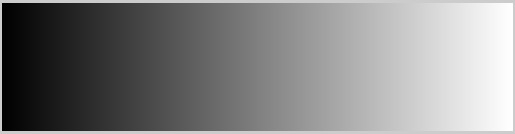
<figcaption>Figure 1: Gradient image</figcaption></center>
</figure>

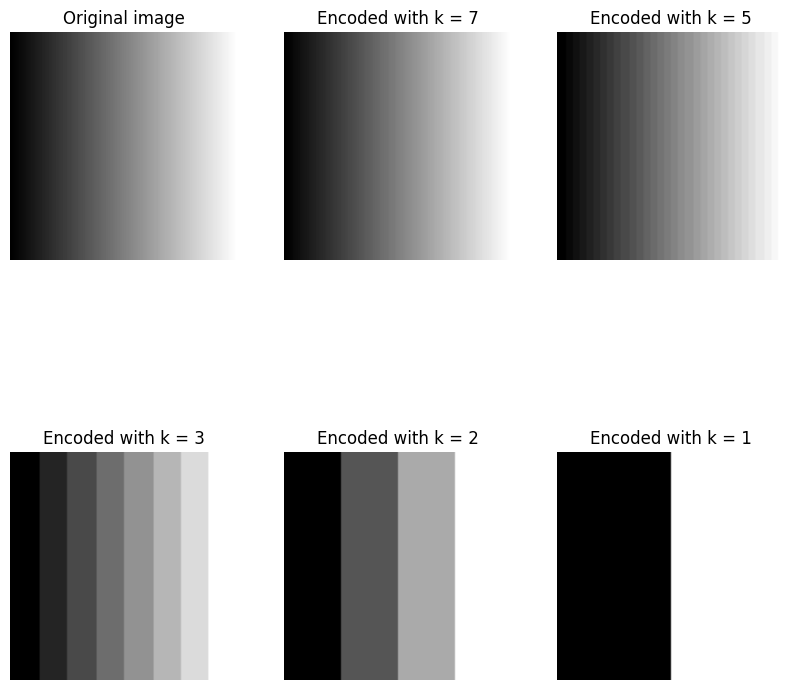

In [56]:
gradient_image = generate_gradient_image(100, 100)

def quantize_image(image: np.ndarray, quantization: int) -> np.ndarray:
    if image.dtype == np.uint8:
        image = np.float32(image/255)
    quantize = np.linspace(0, 1, quantization + 1)
    result = np.digitize(image, quantize)
    result[result >= len(quantize)] = len(quantize) - 1.
    return quantize[result]


def encode_image(image: np.ndarray, k: int) -> np.ndarray:
    return quantize_image(image, 2**k)

def print_encoded_image(image: np.ndarray, cmap='viridis'):
    list_encode = [7, 5, 3, 2, 1]
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 3, 1)
    plt.imshow(image, 'gray')
    plt.axis('off')
    plt.title("Original image")
    for i in range(len(list_encode)):
        plt.subplot(2, 3, i + 2)
        plt.imshow(encode_image(image, list_encode[i]), 'gray')
        plt.axis('off')
        plt.title(f"Encoded with k = {list_encode[i]}")
    plt.show()

print_encoded_image(gradient_image, 'gray')

> Answer here

We can see that the difference between the original image and the image encoded with k = 7 is very small, or even negligible. We can see a small difference between the original image and the k = 5 encoded image, but the quality stay good.

In fact, when we encode an image with k bits, we represent only $2^k$ levels of intensity, that's why the image encoded with k = 1 has $2^1 = 2$ levels of intensity: black and white. And then, with my function, the levels of intensity are distributed fairly between 0 and 256, with a number of $2^k$ differents levels of intensity.

So we can see that there is no major difference between original image and image encoded with k = 7 and k = 5, but when the image is encoded with k = 3, we have a big difference (we just have $2^3 = 8$ levels of intensity represented in our image, so we see a big difference between $2^8 = 256$ and $2^3 = 8$ levels of intensity), like when the image is encoded whith k = 2 and k = 1.

(b) Do the same for the grayscale image *lena.png*.  Display the obtained results.

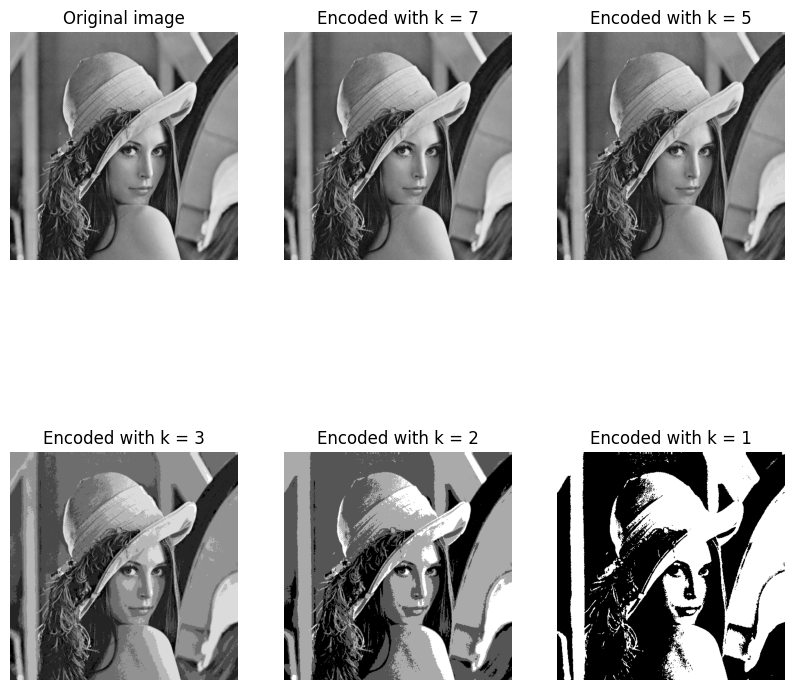

In [57]:
import skimage as sk

lena = plt.imread('./images/lena.png')
graylena = sk.color.rgb2gray(lena)
print_encoded_image(graylena)

> Answer 

When we encode an image with k bits, we represent only $2^k$ levels of intensity, that's why the image encoded with k = 1 has $2^1 = 2$ levels of intensity: black and white. And then, with my function, the levels of intensity are distributed fairly between 0 and 256, with a number of $2^k$ differents levels of intensity.

Personally, I don't see a big difference between the original image and the image encoded with k = 7 and k = 5. But the image encoded with k = 3 is different, as the images encoded with k = 2 and 1. Wee see
a difference because with k = 3, we have just $2^3 = 8$ differents gray intensities which can be represented, again $2^8 = 255$ differents gray intensities in the original image, so it's normal that we can see a difference.

# Exercise 5

(a) Write the function that measures PSNR value between two images (see Theme 2, Lecture notes).

In [58]:
def PSNR(image_1: np.ndarray, image_2: np.ndarray) -> float:
    image2float(image_1)
    image2float(image_2)
    if len(image_1.shape) > 2 and image_1.shape[2] == 3:
        result = 0
        for i in range(3):
            result += 10*np.log10((np.uint(np.max(image_1)*255)**2)/MSE(image_1[:, :, i], image_2[:, :, i]))
        return result /3
    return 10*np.log10((np.uint(np.max(image_1)*255)**2)/MSE(image_1, image_2))

(b) Read the image *lena.png* and convert it to grayscale with dynamic range in $[0,1]$. Create 10 noisy lena images by adding a zero-mean white Gaussian noise with standard deviation $\sigma = 0.1$.

Image data type: float32
Image shape: (496, 496)
Dynamic range: 0.8944583535194397


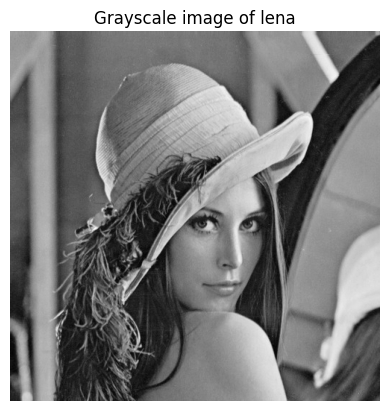

In [59]:
import skimage as sk

lena = plt.imread('./images/lena.png')

lena = image2float(lena)
graylena = sk.color.rgb2gray(lena)
print_informations_image(graylena)

print_image(graylena, "Grayscale image of lena", 'gray')

def create_noise(shape: tuple[int, int], sigma: int) -> np.ndarray:
    return np.float32(sigma * np.random.randn(shape[0], shape[1]))

sigma = 0.1
gaussian_noises = []
for i in range(10):
    #gaussian_noises.append(sk.util.random_noise(graylena, mode='gaussian', clip=True, var=sigma))
    gaussian_noises.append(np.float32(sigma * np.random.randn(lena.shape[0], lena.shape[1])))

(c) Report the average PSNR value between the original and noisy images.
> **Hint** Measure the PSNR between the original and each noisy image, then compute the mean of the results.

In [60]:
average_PSNR = 0
noisy_lena = []
for i in range(len(gaussian_noises)):
    noisy_image = graylena + gaussian_noises[i]
    noisy_lena.append(noisy_image)
    average_PSNR += PSNR(graylena, noisy_image)
average_PSNR /= len(gaussian_noises)
print(f"Average PSNR value between the original and noisy images: {average_PSNR}")

Average PSNR value between the original and noisy images: 30.717480474576906


(d) Perform image denoising by using the so named _frame averaging_ approach.
> **Hint** Perform a pixel-wise summation of all noisy images. Divide the obtained sum image by the number of images in the summation.

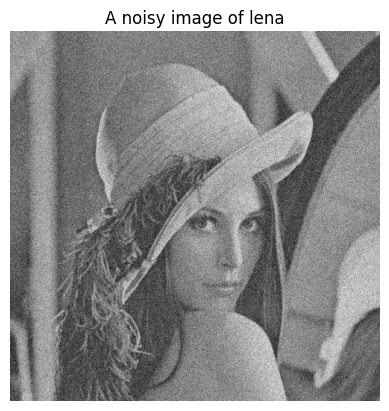

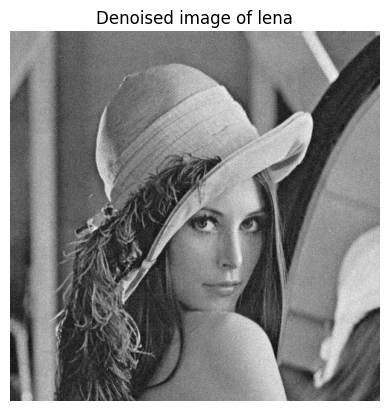

In [61]:
denoised_image = np.mean(noisy_lena, axis=0)
print_image(noisy_lena[0], "A noisy image of lena", 'gray')
print_image(denoised_image, "Denoised image of lena", 'gray')

(e) Measure the PSNR between the original and the denoised image. Comment the obtained result in the light of the previous computations. Explain when (under which condition) _frame averaging_ is successful and when it does not work.

In [39]:
print(f"PSNR between the original and the denoised image: {PSNR(graylena, denoised_image)}")

PSNR between the original and the denoised image: 35.721087554521446


> -- your answer --

We can see that the PSNR (Peak Signal-to-Noise Ratio) between the original image and a noisy image is smaller than the PSNR between the original image and the denoised image. In fact, it's normal because PSNR is a measure of differences the noise of an image, and with frame averaging, we take the mean of each noise, so the noise is less hard because it's an average, but we add some noise because at the begining, we don't necessarily have noise in every region of the image, but with average, some region can have a noise added...

The frame averaging method is successfull if we have many images with noise of the same thing (if the images are very different, it couldn't work...), but don't work if we just have one image.

# Exercise 6

You are given a pair of two images (reference and noisy) from the [RENOIR dataset](http://ani.stat.fsu.edu/~abarbu/Renoir.html).

<p align="center">
<img src="images/reference.bmp" alt="reference" width="300"/>
<img src="images/noisy.bmp" alt="noisy" width="300"/>
</p>

(a) Visualize each color channels for both images (a grayscale display of each channel). Are all channels equally affected by the noise? Justify your answer based on the _PSNR_ or _MSE_.

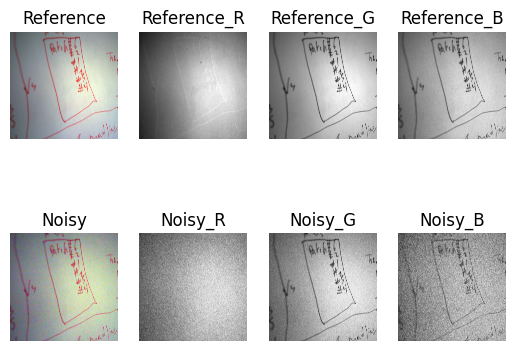

PSNR between R channel of original image and noisy image: 39.496594495075755
PSNR between G channel of original image and noisy image: 39.4074438141269
PSNR between B channel of original image and noisy image: 39.564394164196074


In [62]:
reference = plt.imread("./images/reference.bmp")
noisy = plt.imread("./images/noisy.bmp")

images_to_print = [reference, noisy]
RGB = ["R", "G", "B"]
images_to_print_titles = ["Reference", "Noisy"]

plt.figure()
for i in range(2):
    plt.subplot(2, 4, i * 4 + 1)
    plt.imshow(images_to_print[i])
    plt.axis('off')
    plt.title(images_to_print_titles[i])
    for j in range(3):
        plt.subplot(2, 4, i * 4 + j + 2)
        plt.imshow(images_to_print[i][::, ::, j], cmap='gray')
        plt.axis('off')
        plt.title(images_to_print_titles[i] + "_" + RGB[j])
plt.show()

for i in range(3):
    print("PSNR between " + RGB[i] +" channel of original image and noisy image: " + str(PSNR(reference[:, :, i], noisy[:, :, i])))
    # print("MSE between " + RGB[i] +" channel of original image and noisy image: " + str(MSE(reference[:, :, i], noisy[:, :, i])))

> --your answer --

I think that the channels aren't equally affected by the noise... In fact, I find that it's especially the blue channel which have some noise, and also the red channel, but the green channel seems to be less impacted by the noise... And when we print the PSNR, we can see that the PSNR computed on the blue channel is greater than the PSNR computed on the red channel, which is greater than the PSNR computed on the green channel. And as the PSNR is the peak signal to noise ratio, it means that there is more noise in the blue channel than in the red channel than in the green channel

So the channel which is the most affected by the noise is the blue channel and the channel which is the less affected by the noise is the green channel, as we can see thanks to the PSNR values.

(b) Try to decrease the noise by downsampling the image 2 times and then upsampling it back to its original size. Apply this method to the RGB noisy image. Measure the PSNR between the reference and the obtained denoised images.
> **Hint** To measure the PSNR between RGB images, compute the PSNR for each color channel and then take the average value.

Denoizing: Initial shape of the image: (3000, 3000, 3)
Denoizing: Shape after 2 downsampling: (750, 750, 3)
Denoizing: Final shape: (3000, 3000, 3)


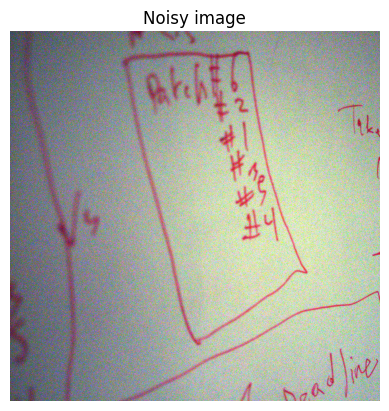

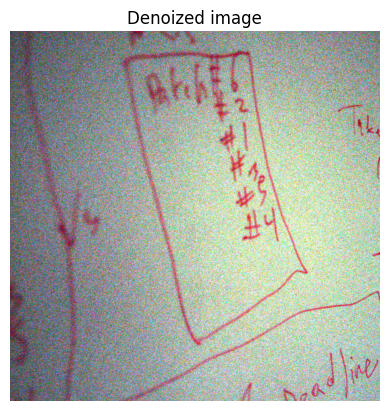

PSNR between reference image and noisy image: 39.48947749113291
PSNR between reference image and denoised image: 39.17072115164472


In [47]:
shape = noisy.shape
print("Denoizing: Initial shape of the image: " + str(shape))

noisy_downsampled = noisy[::4, ::4, :]
# If I use skimage to downsample the image, the results looks better, but the PSNR is the same...
# noisy_downsampled = sk.transform.resize(noisy, (shape[0] // 4, shape[1] // 4))
print("Denoizing: Shape after 2 downsampling: " + str(noisy_downsampled.shape))

noisy_upsampled = sk.transform.resize(noisy_downsampled, shape)
print("Denoizing: Final shape: " + str(noisy_upsampled.shape))
print_image(noisy, "Noisy image")
print_image(noisy_upsampled, "Denoized image")

print(f"PSNR between reference image and noisy image: {PSNR(reference, noisy)}")
print(f"PSNR between reference image and denoised image: {PSNR(reference, noisy_upsampled)}")

(c) Convert both images to grayscale and redo part (b). Explain why the PSNR is higher for the denoised grayscale image.
> **Hint**: The reason is linked to exercise 5. Explain why.

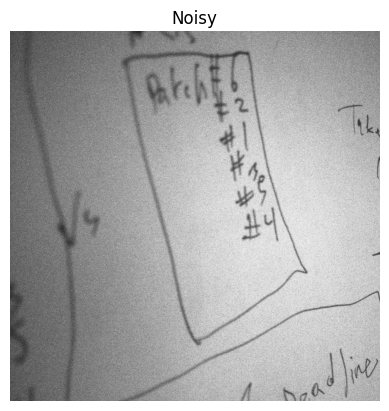

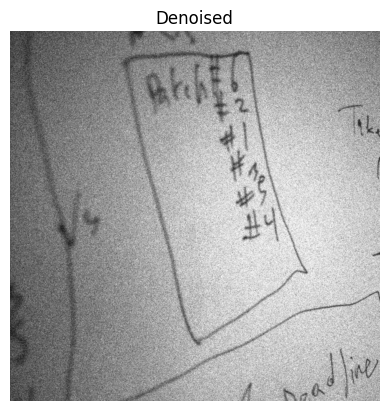

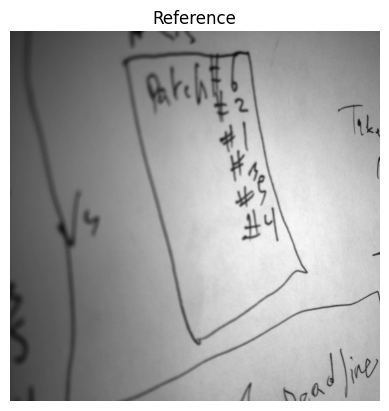

PSNR between reference image and noisy image: 22.62824543586243
PSNR between reference image and denoised image: 24.667714452871614


In [49]:
reference_grayscale = sk.color.rgb2gray(reference)
noisy_grayscale = sk.color.rgb2gray(noisy)
shape = noisy_grayscale.shape

#noisy_denoised = sk.transform.resize(sk.transform.resize(noisy_grayscale, (shape[0] // 4, shape[1] // 4)), shape)
noisy_denoised = sk.transform.resize(noisy_grayscale[::4, ::4], shape)

print_image(noisy_grayscale, "Noisy", 'gray')
print_image(noisy_denoised, "Denoised", 'gray')
print_image(reference_grayscale, "Reference", 'gray')

print(f"PSNR between reference image and noisy image: {PSNR(reference_grayscale, noisy_grayscale)}")
print(f"PSNR between reference image and denoised image: {PSNR(reference_grayscale, noisy_denoised)}")

> --your answer --

We observe that the PSNR of the denoized image is more than the PSNR of the noisy image... But the denoized image looks with more contrast than the noizy image.
Perhaps the denoized image has a bigger PSNR because when we take one pixel on 4 pixels, we can take noisy pixels, so we can have good data lost and noise kept...

(d) What other methods could you suggest to improve the noisy image quality?

> --your answer --

We can't use the frame average method to improve the noisy image quality because we just have one noisy image, that's why the method don't work.
But we can use image processing methods, like BM3D (Block-matching and 3D filtering), which works with a parametric filter, named non-local means.

___